<a href="https://colab.research.google.com/github/ghgit1798/2021-financial-competition/blob/Guhyeon/%EC%8B%A0%ED%95%9C_%EC%9C%A0%ED%86%B5%EC%82%B0%EC%97%85_%ED%81%B4%EB%9F%AC%EC%8A%A4%ED%84%B0%EB%A7%81.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [72]:
import pandas as pd
import plotly.graph_objects as go
from matplotlib import pyplot as plt

from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [73]:
sh = pd.read_csv('신한카드_전처리.csv', index_col=0, encoding='utf-8')

In [74]:
sh.columns

Index(['기준년월', '광역시도명', '업종대분류', '업종중분류', '업종소분류', '신규가맹점수', '해지가맹점수',
       '매출가맹점수', '카드매출금액', '카드매출건수', '점당매출금액', '건당매출금액'],
      dtype='object')

In [78]:
target = '종합유통'
category = '업종대분류'

In [79]:
group = sh.groupby(by=category).sum().reset_index()
n_cols = ['신규가맹점수','해지가맹점수','매출가맹점수', '카드매출금액', '카드매출건수', '점당매출금액', '건당매출금액']
group.drop(columns='기준년월', inplace=True)
group

,업종대분류,신규가맹점수,해지가맹점수,매출가맹점수,카드매출금액,카드매출건수,점당매출금액,건당매출금액
0,기타,0,0,298,536510655000,26429942,32630415137,431028
1,문화레져,14535,11003,604584,1460789771000,36984488,35463948311,466998863
2,생활서비스,17865,10420,1033493,12768340037000,303639697,262539862981,506748391
3,음식,66789,55072,3119532,7139960408000,299308937,13657517419,205746331
4,음식,1,0,10,6777000,88,3680009,917658
5,일반유통,22498,19775,1041532,4477134658000,67913960,161795335539,1074226743
6,전문서비스,23318,16127,1084907,8200716800000,102373719,99894242637,2407934475
7,종합유통,5107,4245,338286,13120767979000,445767635,162249411697,53835764


In [80]:
group = group[group['매출가맹점수']!=0]
group = group[group['카드매출건수']!=0]

In [81]:
# 점당매출금액, 건당매출금액 재계산
group['점당매출금액'] = group['카드매출금액']//group['매출가맹점수']
group['건당매출금액'] = group['카드매출금액']//group['카드매출건수']

In [82]:
# 표준화 수행
cls = group[n_cols]
scaler = MinMaxScaler()
scaler.fit(cls)
scaled = scaler.transform(cls)
scaled

array([[0.00000000e+00, 0.00000000e+00, 9.23218365e-05, 4.08896915e-02,
        5.92906643e-02, 1.00000000e+00, 0.00000000e+00],
       [2.17625657e-01, 1.99792998e-01, 1.93803410e-01, 1.11333708e-01,
        8.29679061e-02, 9.65991642e-04, 3.21004581e-01],
       [2.67484167e-01, 1.89206856e-01, 3.31295307e-01, 9.73139673e-01,
        6.81161316e-01, 6.48824269e-03, 3.63692606e-01],
       [1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 5.44172211e-01,
        6.71446028e-01, 8.95203482e-04, 5.94421964e-02],
       [1.49725254e-05, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 9.48266060e-01],
       [3.36851877e-01, 3.59075392e-01, 3.33872305e-01, 3.41224706e-01,
        1.52352661e-01, 2.01195578e-03, 7.62866602e-01],
       [3.49129348e-01, 2.92834834e-01, 3.47776679e-01, 6.25017855e-01,
        2.29656985e-01, 3.82354636e-03, 1.00000000e+00],
       [7.64646873e-02, 7.70809123e-02, 1.08438408e-01, 1.00000000e+00,
        1.00000000e+00, 2

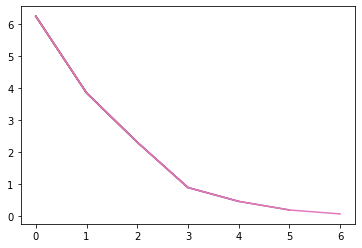

In [83]:
# screeplot 그리기
def elbow(x):
  sse = []

  for i in range(1, 8):
    km = KMeans(n_clusters=i)
    km.fit(x)
    sse.append(km.inertia_)
    plt.plot(sse)
  plt.show()

elbow(scaled)

In [84]:
# cluster 수는 3개로 결정
km = KMeans(n_clusters=3)
km.fit(scaled)
km.cluster_centers_

array([[1.80724371e-01, 1.70340645e-01, 1.75108943e-01, 2.23693192e-01,
        1.04853643e-01, 2.01360299e-01, 6.06427449e-01],
       [1.71974427e-01, 1.33143884e-01, 2.19866858e-01, 9.86569836e-01,
        8.40580658e-01, 1.38315681e-02, 2.58218239e-01],
       [1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 5.44172211e-01,
        6.71446028e-01, 8.95203482e-04, 5.94421964e-02]])

In [85]:
cluster = pd.DataFrame(km.cluster_centers_, columns=cls.columns)
cluster.sort_values(by='카드매출금액', ascending=False, inplace=True)
cluster

,신규가맹점수,해지가맹점수,매출가맹점수,카드매출금액,카드매출건수,점당매출금액,건당매출금액
1,0.171974,0.133144,0.219867,0.986570,0.840581,0.013832,0.258218
2,1.000000,1.000000,1.000000,0.544172,0.671446,0.000895,0.059442
0,0.180724,0.170341,0.175109,0.223693,0.104854,0.201360,0.606427


In [86]:
predict = pd.DataFrame(km.predict(scaled))
predict.columns = ['Cluster']
predict

,Cluster
0,0
1,0
2,1
3,2
4,0
5,0
6,0
7,1


In [87]:
scaled = pd.DataFrame(data=scaled, columns=cls.columns)
scaled

,신규가맹점수,해지가맹점수,매출가맹점수,카드매출금액,카드매출건수,점당매출금액,건당매출금액
0,0.000000,0.000000,0.000092,0.040890,0.059291,1.000000,0.000000
1,0.217626,0.199793,0.193803,0.111334,0.082968,0.000966,0.321005
2,0.267484,0.189207,0.331295,0.973140,0.681161,0.006488,0.363693
3,1.000000,1.000000,1.000000,0.544172,0.671446,0.000895,0.059442
4,0.000015,0.000000,0.000000,0.000000,0.000000,0.000000,0.948266
5,0.336852,0.359075,0.333872,0.341225,0.152353,0.002012,0.762867
6,0.349129,0.292835,0.347777,0.625018,0.229657,0.003824,1.000000
7,0.076465,0.077081,0.108438,1.000000,1.000000,0.021175,0.152744


In [90]:
names = pd.DataFrame(group[category])
names.reset_index(inplace=True, drop=True)
names

,업종대분류
0,기타
1,문화레져
2,생활서비스
3,음식
4,음식
5,일반유통
6,전문서비스
7,종합유통


In [91]:
# names와 결합
result = pd.concat([scaled, names], axis=1)
result = pd.concat([result, predict], axis=1)
result

,신규가맹점수,해지가맹점수,매출가맹점수,카드매출금액,카드매출건수,점당매출금액,건당매출금액,업종대분류,Cluster
0,0.000000,0.000000,0.000092,0.040890,0.059291,1.000000,0.000000,기타,0
1,0.217626,0.199793,0.193803,0.111334,0.082968,0.000966,0.321005,문화레져,0
2,0.267484,0.189207,0.331295,0.973140,0.681161,0.006488,0.363693,생활서비스,1
3,1.000000,1.000000,1.000000,0.544172,0.671446,0.000895,0.059442,음식,2
4,0.000015,0.000000,0.000000,0.000000,0.000000,0.000000,0.948266,음식,0
5,0.336852,0.359075,0.333872,0.341225,0.152353,0.002012,0.762867,일반유통,0
6,0.349129,0.292835,0.347777,0.625018,0.229657,0.003824,1.000000,전문서비스,0
7,0.076465,0.077081,0.108438,1.000000,1.000000,0.021175,0.152744,종합유통,1


In [93]:
def show_cluster(result, name):
  categories = n_cols
  color = ['skyblue', 'blue', 'salmon', 'green']

  target = result[result[category]==name]

  fig = go.Figure()

  fig.add_trace(go.Scatterpolar(
      r = cluster.values[0],
      theta = categories,
      fill='toself',
      name='필수산업',
      line_color=color[0]
  ))

  fig.add_trace(go.Scatterpolar(
      r = cluster.values[1],
      theta = categories,
      fill='toself',
      name='주류산업',
      line_color=color[1]
  ))

  fig.add_trace(go.Scatterpolar(
      r = cluster.values[2],
      theta = categories,
      fill='toself',
      name='비주류산업',
      line_color=color[2]
  ))

  fig.add_trace(go.Scatterpolar(
      r = target.values[0],
      theta = categories,
      fill='toself',
      name=name,
      line_color=color[3]
  ))

  fig.update_layout(
    polar=dict(
      radialaxis=dict(
        title=str(target['Cluster']),
        visible=True,
      )),
  )
  print(target['Cluster'])
  fig.show()

# 클라우드 맥주 클러스터링 결과
show_cluster(result, target)

7    1
Name: Cluster, dtype: int32
